<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/CA_solve_PDE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

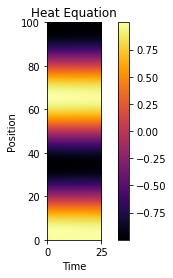

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the simulation
N = 100  # number of grid points
T = 50  # number of time steps
kappa = 0.1  # diffusion constant
dx = 1.0  # grid spacing
dt = 0.5  # time step

# Define the initial conditions
u = np.zeros((N, T))
u[50, 0] = 1.0  # initial heat pulse

# Define the update rule for the cellular automaton
def heat_eqn(u, kappa, dx, dt):
    # Compute the second derivative of u with respect to x
    d2u = np.zeros_like(u)
    d2u[1:-1, :] = (u[:-2, :] - 2*u[1:-1, :] + u[2:, :]) / dx**2

    # Compute the new value of u using the diffusion equation
    u_new = u + kappa*dt*d2u

    # Apply boundary conditions
    u_new[0, :] = u_new[1, :]
    u_new[-1, :] = u_new[-2, :]

    return u_new
# Initialize the array u as a 2D array with shape (Nx, T)
u = np.zeros((N, T))

# Set the initial condition
# Define the values of x that we want to plot
x = np.linspace(-5, 5, 100)
u[:, 0] = np.sin(x)

# Run the simulation
for i in range(1, T):
    # Reshape the i-th column of u to a 1D array
    u_i = u[:, i-1].reshape(N, 1)
    # Compute the new value of u using heat_eqn
    u[:, i] = heat_eqn(u_i, kappa, dx, dt).flatten()


# Plot the results
fig, ax = plt.subplots()
im = ax.imshow(u, cmap='inferno', origin='lower', extent=[0, T*dt, 0, N*dx])
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_title('Heat Equation')
fig.colorbar(im)
plt.show()
